## Prepare rules for the all the data sets 
### 1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
### 2) Change the minimum length in apriori algorithm
### 3) Visulize the obtained rules using different plots 

# Book Dataset

In [1]:
!pip install mlxtend

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
# Libraries
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving book (1).csv to book (1).csv


In [5]:
# Data
book=pd.read_csv("book (1).csv")
book.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


## Apriori Algorithim : min_support=0.1,min_threshold=0.7

In [6]:
# Apriori Algorithim
frq_itemsets= apriori(book,min_support=0.1,use_colnames=True)
frq_itemsets

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(ChildBks, YouthBks)"


In [7]:
rules= association_rules(frq_itemsets,metric="lift",min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
96,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
97,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


<StemContainer object of 3 artists>

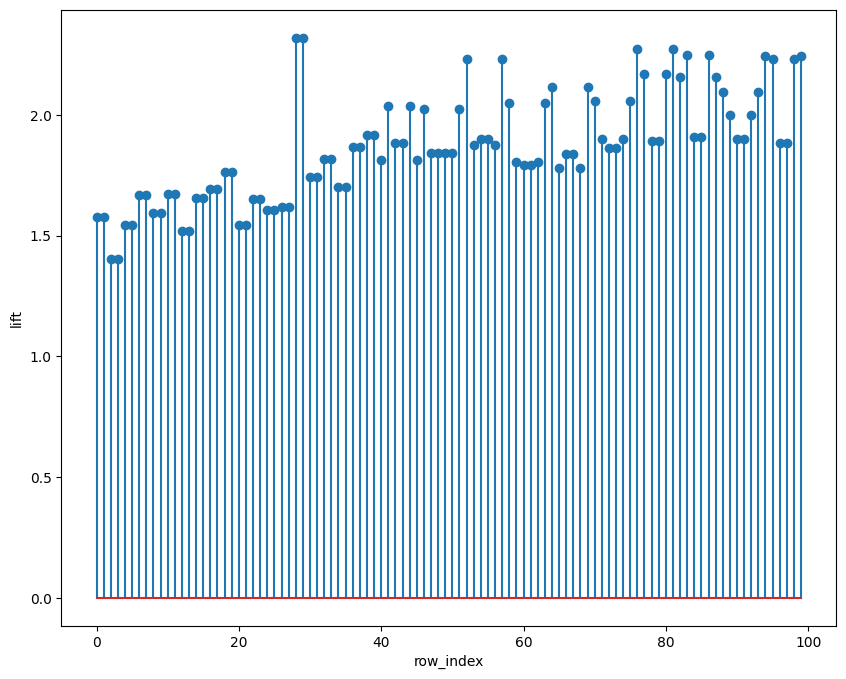

In [8]:
#visualizing
plt.figure(figsize=(10,8))
plt.ylabel("lift")
plt.xlabel("row_index")
plt.stem(np.arange(len(rules)),np.round(rules["lift"],4))


In [9]:
 # sorting rules based on the  lifts  (top 20 rules).
rules.sort_values('lift',ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
29,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
76,"(ChildBks, ArtBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
81,(GeogBks),"(ChildBks, ArtBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
86,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
83,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
99,(GeogBks),"(CookBks, ArtBks)",0.2760,0.1670,0.1035,0.375000,2.245509,0.057408,1.332800
94,"(CookBks, ArtBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657


In [10]:
# # all the rules with lift ratio>1.
rules[rules.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
95,"(CookBks, GeogBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
96,"(ArtBks, GeogBks)",(CookBks),0.1275,0.4310,0.1035,0.811765,1.883445,0.048547,3.022812
97,(CookBks),"(ArtBks, GeogBks)",0.4310,0.1275,0.1035,0.240139,1.883445,0.048547,1.148237
98,(ArtBks),"(CookBks, GeogBks)",0.2410,0.1925,0.1035,0.429461,2.230964,0.057107,1.415327


## Apriori Algorithim : min_support=0.15,min_threshold=0.6

In [11]:
frq_itemsets1= apriori(book,min_support=0.15,use_colnames=True)
frq_itemsets1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1650,"(ChildBks, YouthBks)"
8,0.2560,"(ChildBks, CookBks)"
9,0.1840,"(ChildBks, DoItYBks)"


In [12]:
rules1= association_rules(frq_itemsets1,metric="lift",min_threshold=0.6)
rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
8,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464
9,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427


<StemContainer object of 3 artists>

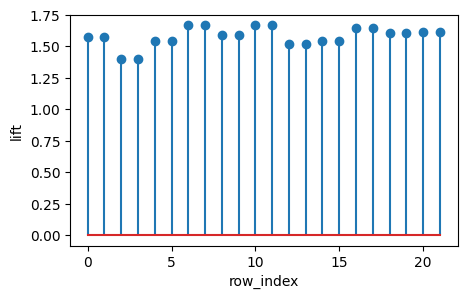

In [13]:
#visualizing
plt.figure(figsize=(5,3))
plt.ylabel("lift")
plt.xlabel("row_index")
plt.stem(np.arange(len(rules1)),np.round(rules1["lift"],4))

In [14]:
 # sorting rules based on the  lifts  (top 10 rules).
rules1.sort_values('lift',ascending=False)[0:10]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
10,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211
11,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
17,(RefBks),(CookBks),0.2145,0.4310,0.1525,0.710956,1.649549,0.060050,1.968556
16,(CookBks),(RefBks),0.4310,0.2145,0.1525,0.353828,1.649549,0.060050,1.215621
20,(CookBks),(GeogBks),0.4310,0.2760,0.1925,0.446636,1.618245,0.073544,1.308361
21,(GeogBks),(CookBks),0.2760,0.4310,0.1925,0.697464,1.618245,0.073544,1.880766
18,(CookBks),(ArtBks),0.4310,0.2410,0.1670,0.387471,1.607763,0.063129,1.239125
19,(ArtBks),(CookBks),0.2410,0.4310,0.1670,0.692946,1.607763,0.063129,1.853095


In [15]:
# # all the rules with lift ratio>1.
rules1[rules1.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
1,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
7,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
8,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464
9,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427


##  Apriori Algorithim : min_support=0.18,min_threshold=0.4 

In [16]:
frq_itemsets2= apriori(book,min_support=0.18,use_colnames=True)
frq_itemsets2

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.2560,"(ChildBks, CookBks)"
8,0.1840,"(ChildBks, DoItYBks)"
9,0.1950,"(ChildBks, GeogBks)"


In [17]:
rules2= association_rules(frq_itemsets2,metric="lift",min_threshold=0.4)
rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(DoItYBks),0.423,0.282,0.1840,0.434988,1.542511,0.064714,1.270770
3,(DoItYBks),(ChildBks),0.282,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
4,(ChildBks),(GeogBks),0.423,0.276,0.1950,0.460993,1.670264,0.078252,1.343211
5,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
6,(CookBks),(DoItYBks),0.431,0.282,0.1875,0.435035,1.542677,0.065958,1.270875
7,(DoItYBks),(CookBks),0.282,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
8,(CookBks),(GeogBks),0.431,0.276,0.1925,0.446636,1.618245,0.073544,1.308361
9,(GeogBks),(CookBks),0.276,0.431,0.1925,0.697464,1.618245,0.073544,1.880766


<StemContainer object of 3 artists>

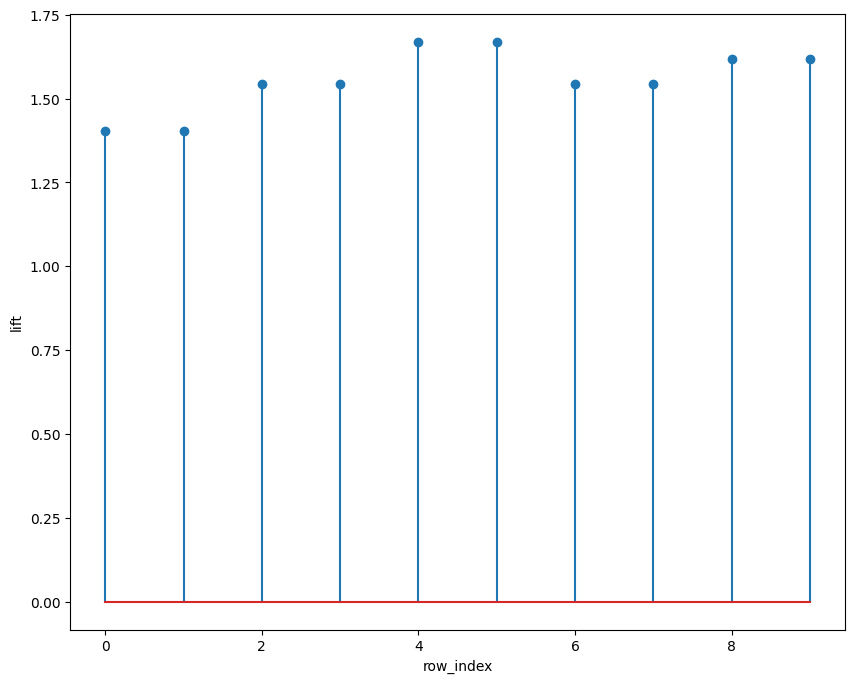

In [18]:
#visualizing
plt.figure(figsize=(10,8))
plt.ylabel("lift")
plt.xlabel("row_index")
plt.stem(np.arange(len(rules2)),np.round(rules2["lift"],4))

In [19]:
 # sorting rules based on the  lifts  (top 5 rules).
rules2.sort_values('lift',ascending=False)[0:5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4,(ChildBks),(GeogBks),0.423,0.276,0.1950,0.460993,1.670264,0.078252,1.343211
5,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
8,(CookBks),(GeogBks),0.431,0.276,0.1925,0.446636,1.618245,0.073544,1.308361
9,(GeogBks),(CookBks),0.276,0.431,0.1925,0.697464,1.618245,0.073544,1.880766
6,(CookBks),(DoItYBks),0.431,0.282,0.1875,0.435035,1.542677,0.065958,1.270875


In [20]:
# # all the rules with lift ratio>1.
rules2[rules2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ChildBks),(CookBks),0.423,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
1,(CookBks),(ChildBks),0.431,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
2,(ChildBks),(DoItYBks),0.423,0.282,0.1840,0.434988,1.542511,0.064714,1.270770
3,(DoItYBks),(ChildBks),0.282,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
4,(ChildBks),(GeogBks),0.423,0.276,0.1950,0.460993,1.670264,0.078252,1.343211
5,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
6,(CookBks),(DoItYBks),0.431,0.282,0.1875,0.435035,1.542677,0.065958,1.270875
7,(DoItYBks),(CookBks),0.282,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
8,(CookBks),(GeogBks),0.431,0.276,0.1925,0.446636,1.618245,0.073544,1.308361
9,(GeogBks),(CookBks),0.276,0.431,0.1925,0.697464,1.618245,0.073544,1.880766


# My_Movies Dataset

In [22]:
from google.colab import files
uploaded=files.upload()

Saving my_movies (1).csv to my_movies (1).csv


In [23]:
#data
movies=pd.read_csv("my_movies (1).csv")
movies.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [24]:
#pre_processing 
df=pd.get_dummies(movies)
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile,...,V2_LOTR,V2_LOTR1,V2_LOTR2,V2_Patriot,V3_Braveheart,V3_Gladiator,V3_Harry Potter1,V3_Sixth Sense,V4_Green Mile,V5_LOTR2
0,1,0,1,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,0,1,1
1,0,1,0,0,1,0,0,0,1,0,...,0,0,0,1,1,0,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
4,1,1,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0


## Apriori Algorithim: min support=0.1, min threshold=0.7

In [25]:
f_item=apriori(df,min_support=0.1,use_colnames=True)
f_item

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
1392,0.1,"(Green Mile, LOTR1, V3_Harry Potter1, Harry Po..."
1393,0.1,"(Green Mile, LOTR2, LOTR1, V3_Harry Potter1, V..."
1394,0.1,"(Green Mile, LOTR2, V3_Harry Potter1, Harry Po..."
1395,0.1,"(Green Mile, LOTR2, LOTR1, V3_Harry Potter1, H..."


In [26]:
Rules=association_rules(f_item,metric="lift",min_threshold=0.7)
Rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.40
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.80
2,(Sixth Sense),(LOTR1),0.6,0.2,0.1,0.166667,0.833333,-0.02,0.96
3,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
4,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.80
...,...,...,...,...,...,...,...,...,...
64247,(V1_Sixth Sense),"(Green Mile, LOTR2, LOTR1, V3_Harry Potter1, H...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64248,(V4_Green Mile),"(Green Mile, LOTR2, LOTR1, V3_Harry Potter1, H...",0.2,0.1,0.1,0.500000,5.000000,0.08,1.80
64249,(V2_LOTR1),"(Green Mile, LOTR2, LOTR1, V3_Harry Potter1, H...",0.1,0.1,0.1,1.000000,10.000000,0.09,inf
64250,(Sixth Sense),"(Green Mile, LOTR2, LOTR1, V3_Harry Potter1, H...",0.6,0.1,0.1,0.166667,1.666667,0.04,1.08


<StemContainer object of 3 artists>

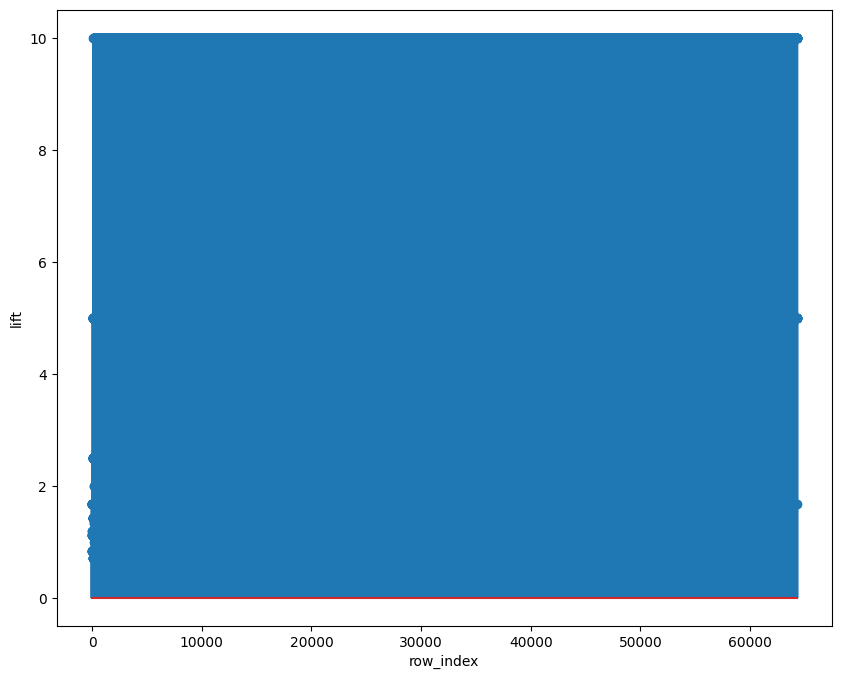

In [27]:
#visualizing
plt.figure(figsize=(10,8))
plt.ylabel("lift")
plt.xlabel("row_index")
plt.stem(np.arange(len(Rules)),np.round(Rules["lift"],4))

In [28]:
 # sorting rules based on the  lifts  (top 20 rules).
Rules.sort_values('lift',ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32126,"(Harry Potter1, Green Mile, Sixth Sense, V3_Ha...","(LOTR2, V5_LOTR2, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42207,"(Harry Potter1, Green Mile, V5_LOTR2, V1_Sixth...","(V2_LOTR1, LOTR2, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42195,"(Harry Potter1, Green Mile, V2_LOTR1, LOTR2)","(V5_LOTR2, V1_Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42196,"(Harry Potter1, Green Mile, LOTR2, V5_LOTR2)","(V2_LOTR1, V1_Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42197,"(Green Mile, V2_LOTR1, LOTR2, V1_Sixth Sense)","(Harry Potter1, V5_LOTR2, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42198,"(Green Mile, LOTR2, V5_LOTR2, V1_Sixth Sense)","(Harry Potter1, V2_LOTR1, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42199,"(Green Mile, V2_LOTR1, LOTR2, V5_LOTR2)","(Harry Potter1, V1_Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42200,"(Harry Potter1, Green Mile, V1_Sixth Sense, LO...","(V2_LOTR1, LOTR2, V5_LOTR2)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42201,"(Harry Potter1, Green Mile, V2_LOTR1, LOTR1)","(V5_LOTR2, LOTR2, V1_Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf
42202,"(Harry Potter1, Green Mile, V5_LOTR2, LOTR1)","(V2_LOTR1, LOTR2, V1_Sixth Sense)",0.1,0.1,0.1,1.0,10.0,0.09,inf


In [29]:
# # all the rules with lift ratio>5.
Rules[Rules.lift>5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
124,(Harry Potter2),(V1_Harry Potter1),0.1,0.1,0.1,1.0,10.0,0.09,inf
125,(V1_Harry Potter1),(Harry Potter2),0.1,0.1,0.1,1.0,10.0,0.09,inf
126,(Harry Potter2),(V2_Harry Potter2),0.1,0.1,0.1,1.0,10.0,0.09,inf
127,(V2_Harry Potter2),(Harry Potter2),0.1,0.1,0.1,1.0,10.0,0.09,inf
132,(V2_LOTR),(LOTR),0.1,0.1,0.1,1.0,10.0,0.09,inf
...,...,...,...,...,...,...,...,...,...
64240,"(V2_LOTR1, V5_LOTR2)","(Green Mile, LOTR2, V3_Harry Potter1, LOTR1, H...",0.1,0.1,0.1,1.0,10.0,0.09,inf
64241,"(Sixth Sense, V5_LOTR2)","(Green Mile, LOTR2, V3_Harry Potter1, LOTR1, H...",0.1,0.1,0.1,1.0,10.0,0.09,inf
64245,(V3_Harry Potter1),"(Green Mile, LOTR2, LOTR1, Harry Potter1, V1_S...",0.1,0.1,0.1,1.0,10.0,0.09,inf
64249,(V2_LOTR1),"(Green Mile, LOTR2, LOTR1, V3_Harry Potter1, H...",0.1,0.1,0.1,1.0,10.0,0.09,inf


# Apriori Algorithim: min support=0.2, min threshold=0.5

In [30]:
f_item1=apriori(df,min_support=0.2,use_colnames=True)
f_item1

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
...,...,...
76,0.4,"(Gladiator, V2_Patriot, Patriot, V3_Sixth Sens..."
77,0.4,"(Gladiator, V2_Patriot, V3_Sixth Sense, Sixth ..."
78,0.4,"(V2_Patriot, Patriot, V3_Sixth Sense, Sixth Se..."
79,0.4,"(Gladiator, V2_Patriot, Patriot, V3_Sixth Sens..."


In [31]:
Rules1=association_rules(f_item1,metric="lift",min_threshold=0.5)
Rules1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
...,...,...,...,...,...,...,...,...,...
649,(V2_Patriot),"(Gladiator, Patriot, V3_Sixth Sense, Sixth Sen...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
650,(Patriot),"(Gladiator, V2_Patriot, V3_Sixth Sense, Sixth ...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8
651,(V3_Sixth Sense),"(Gladiator, V2_Patriot, Patriot, Sixth Sense, ...",0.4,0.4,0.4,1.000000,2.500000,0.24,inf
652,(Sixth Sense),"(Gladiator, V2_Patriot, Patriot, V3_Sixth Sens...",0.6,0.4,0.4,0.666667,1.666667,0.16,1.8


<StemContainer object of 3 artists>

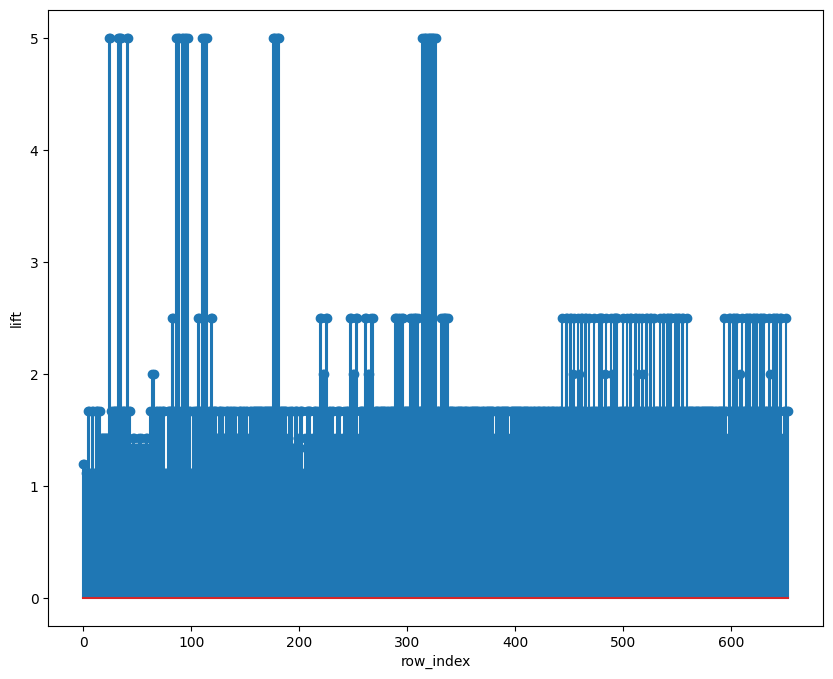

In [32]:
#visualizing
plt.figure(figsize=(10,8))
plt.ylabel("lift")
plt.xlabel("row_index")
plt.stem(np.arange(len(Rules1)),np.round(Rules1["lift"],4))

In [33]:
 # sorting rules based on the  lifts  (top 20 rules).
Rules1.sort_values('lift',ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
327,(V1_Sixth Sense),"(Green Mile, Sixth Sense, V4_Green Mile)",0.2,0.2,0.2,1.0,5.0,0.16,inf
176,"(Green Mile, V4_Green Mile)",(V1_Sixth Sense),0.2,0.2,0.2,1.0,5.0,0.16,inf
40,(V4_Green Mile),(V1_Sixth Sense),0.2,0.2,0.2,1.0,5.0,0.16,inf
41,(V1_Sixth Sense),(V4_Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
86,"(Green Mile, Sixth Sense)",(V1_Sixth Sense),0.2,0.2,0.2,1.0,5.0,0.16,inf
88,"(Sixth Sense, V1_Sixth Sense)",(Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
89,(Green Mile),"(Sixth Sense, V1_Sixth Sense)",0.2,0.2,0.2,1.0,5.0,0.16,inf
91,(V1_Sixth Sense),"(Green Mile, Sixth Sense)",0.2,0.2,0.2,1.0,5.0,0.16,inf
92,"(Green Mile, Sixth Sense)",(V4_Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
94,"(Sixth Sense, V4_Green Mile)",(Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf


In [34]:
# # all the rules with lift ratio>4.
Rules1[Rules1.lift>4]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
24,(LOTR2),(LOTR1),0.2,0.2,0.2,1.0,5.0,0.16,inf
25,(LOTR1),(LOTR2),0.2,0.2,0.2,1.0,5.0,0.16,inf
32,(Green Mile),(V1_Sixth Sense),0.2,0.2,0.2,1.0,5.0,0.16,inf
33,(V1_Sixth Sense),(Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
34,(Green Mile),(V4_Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
35,(V4_Green Mile),(Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
40,(V4_Green Mile),(V1_Sixth Sense),0.2,0.2,0.2,1.0,5.0,0.16,inf
41,(V1_Sixth Sense),(V4_Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf
86,"(Green Mile, Sixth Sense)",(V1_Sixth Sense),0.2,0.2,0.2,1.0,5.0,0.16,inf
88,"(Sixth Sense, V1_Sixth Sense)",(Green Mile),0.2,0.2,0.2,1.0,5.0,0.16,inf


#  Apriori Algorithim: min support=0.2, min threshold=0.8

In [35]:
f_item2=apriori(df,min_support=0.5,use_colnames=True)
f_item2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.6,(V1_Gladiator)
4,0.6,(V2_Patriot)
5,0.5,"(Gladiator, Sixth Sense)"
6,0.6,"(Gladiator, Patriot)"
7,0.6,"(Gladiator, V1_Gladiator)"
8,0.6,"(Gladiator, V2_Patriot)"
9,0.6,"(V1_Gladiator, Patriot)"


In [36]:
Rules2=association_rules(f_item2,metric="lift",min_threshold=0.8)
Rules2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
4,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf


<StemContainer object of 3 artists>

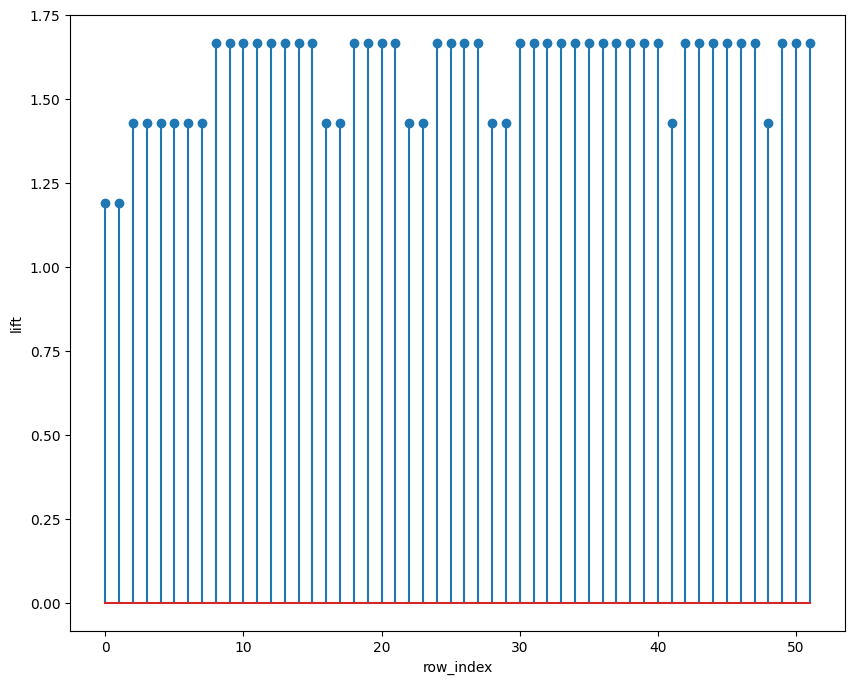

In [37]:
#visualizing
plt.figure(figsize=(10,8))
plt.ylabel("lift")
plt.xlabel("row_index")
plt.stem(np.arange(len(Rules2)),np.round(Rules2["lift"],4))

In [38]:
 # sorting rules based on the  lifts  (top 20 rules).
Rules2.sort_values('lift',ascending=False)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
26,"(Gladiator, V1_Gladiator)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
38,"(Gladiator, V1_Gladiator, V2_Patriot)",(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
27,"(Gladiator, V2_Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
30,(V1_Gladiator),"(Gladiator, V2_Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
31,(V2_Patriot),"(Gladiator, V1_Gladiator)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
32,"(V1_Gladiator, V2_Patriot)",(Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
33,"(V1_Gladiator, Patriot)",(V2_Patriot),0.6,0.6,0.6,1.0,1.666667,0.24,inf
34,"(V2_Patriot, Patriot)",(V1_Gladiator),0.6,0.6,0.6,1.0,1.666667,0.24,inf
35,(V1_Gladiator),"(V2_Patriot, Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf
36,(V2_Patriot),"(V1_Gladiator, Patriot)",0.6,0.6,0.6,1.0,1.666667,0.24,inf


In [39]:
# # all the rules with lift ratio>1.
Rules2[Rules2.lift>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
4,(Gladiator),(V1_Gladiator),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
5,(V1_Gladiator),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
6,(Gladiator),(V2_Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
7,(V2_Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
8,(V1_Gladiator),(Patriot),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
9,(Patriot),(V1_Gladiator),0.6,0.6,0.6,1.000000,1.666667,0.24,inf
